<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_01_Gemini_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-bm6xnio_
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-bm6xnio_
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [78]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [176]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

In [177]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(2, 'c')
#cr_result = ClassicalRegister(1, 'result')
qc = QuantumCircuit(qr, cr, name='teleporting')

In [178]:
# 예시: 텔레포트할 큐비트를 |1> 상태로 초기화
qc.x(qr[0])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [179]:
qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [180]:
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [181]:
qc.measure(qr[1], cr[1])
qc.measure(qr[0], cr[0])
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

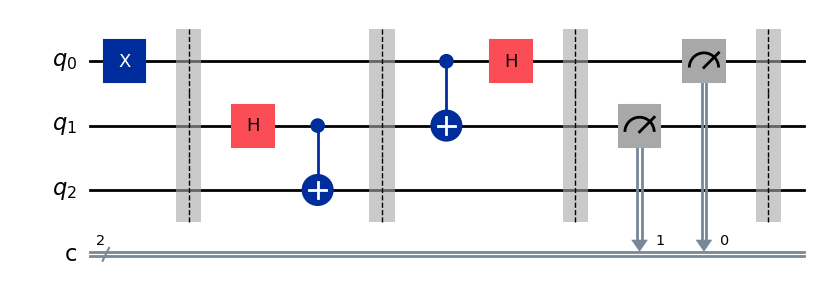

In [182]:
qc.draw('mpl')

In [183]:
simulator = Aer.get_backend("qasm_simulator")
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print("\n시뮬레이션 결과:", counts)


시뮬레이션 결과: {'11': 275, '00': 257, '10': 252, '01': 240}


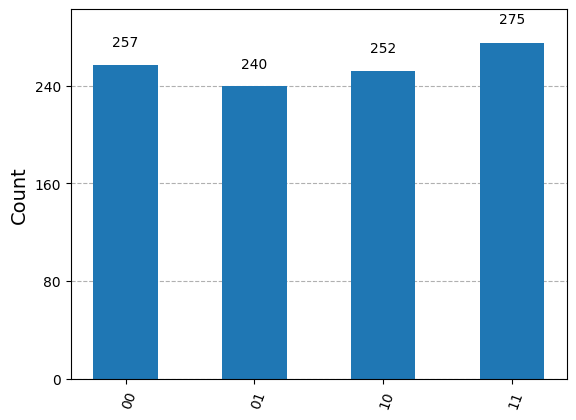

In [184]:
plot_histogram(counts)

In [185]:
cr[0]

Clbit(ClassicalRegister(2, 'c'), 0)

In [186]:
cr[1]

Clbit(ClassicalRegister(2, 'c'), 1)

In [187]:
qr2 = QuantumRegister(3, 'q2')
#cr2 = ClassicalRegister(2, 'c2')
cr2_result = ClassicalRegister(1, 'result')
qc2 = QuantumCircuit(qr2, cr, cr2_result, name='teleported')

qc2.reset(qr2[2])

qc2.barrier()
qc2.x(qr2[2]).c_if(cr[1], 1)  # cr[1]이 1이면 X 게이트 적용
qc2.z(qr2[2]).c_if(cr[0], 1)  # cr[0]이 1이면 Z 게이트 적용
qc2.barrier()
qc2.measure(qr2[2], cr2_result)

In [188]:
cr[0]

Clbit(ClassicalRegister(2, 'c'), 0)

In [189]:
cr[1]

Clbit(ClassicalRegister(2, 'c'), 1)

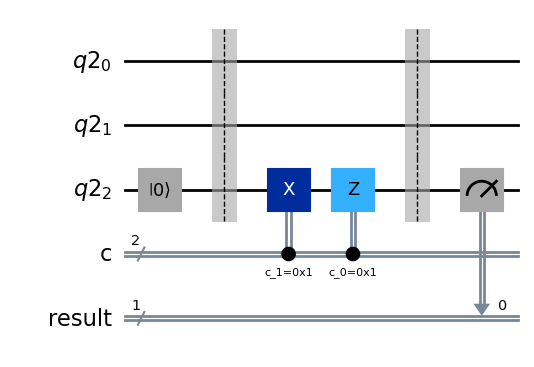

In [190]:
qc2.draw('mpl')

In [191]:
#simulator2 = Aer.get_backend("qasm_simulator")
compiled_circuit2 = transpile(qc2, simulator)
job2 = simulator.run(compiled_circuit2, shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()
print("\n시뮬레이션 결과:", counts2)


시뮬레이션 결과: {'0 00': 1024}


In [193]:
cr2_result[0]

Clbit(ClassicalRegister(1, 'result'), 0)

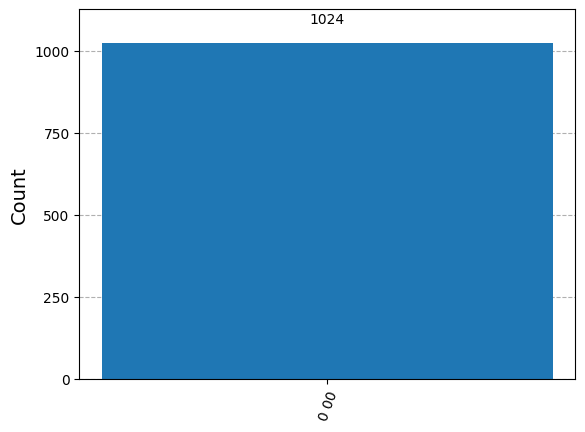

In [194]:
plot_histogram(counts2)